In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
14/20

[1] 0.7

In [3]:
stevens = read.csv('data/stevens.csv.xz')
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [5]:
library(caTools)
set.seed(3000)
spl = sample.split(stevens$Reverse, SplitRatio=0.7)
Train = subset(stevens, spl == T)
Test = subset(stevens, spl == F)

In [6]:
library(rpart)
library(rpart.plot)

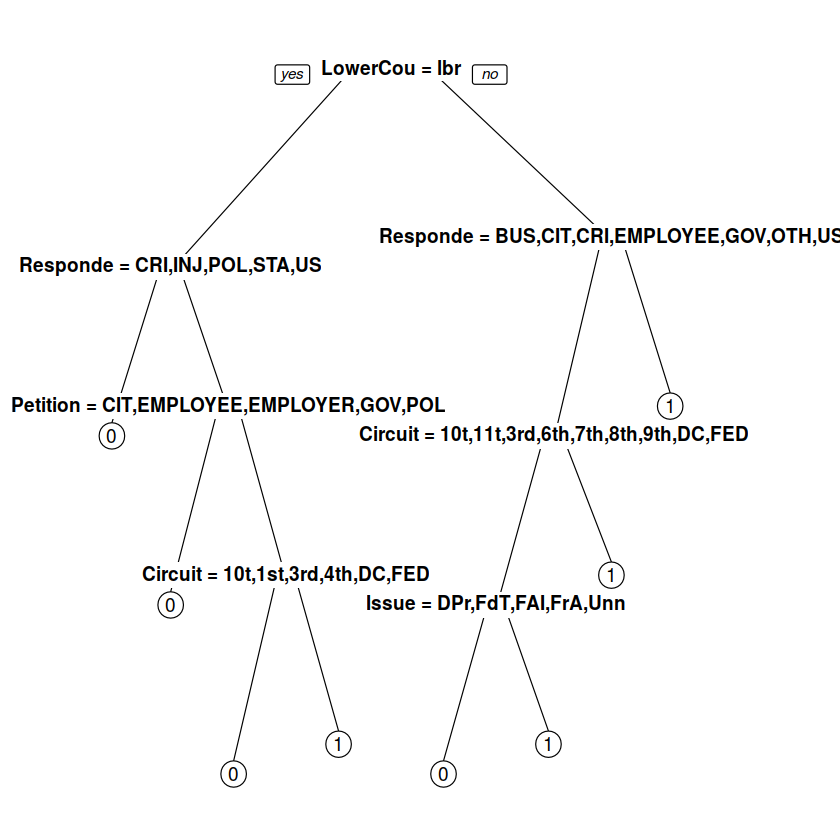

In [7]:
StevensTree = rpart(Reverse ~ Circuit + Issue + Petitioner +
                    Respondent + LowerCourt + Unconst, data=Train,
                    method='class', minbucket=25)
prp(StevensTree)

In [8]:
PredictCART = predict(StevensTree, newdata=Test, type='class')
table(Test$Reverse, PredictCART)

   PredictCART
     0  1
  0 41 36
  1 22 71

In [9]:
(41+71)/(41+36+22+71)

[1] 0.6588235

In [11]:
library(ROCR)
PredictROC = predict(StevensTree, newdata=Test)
head(PredictROC)

,0,1
1,0.3035714,0.6964286
3,0.3035714,0.6964286
4,0.4,0.6
6,0.4,0.6
8,0.4,0.6
21,0.3035714,0.6964286


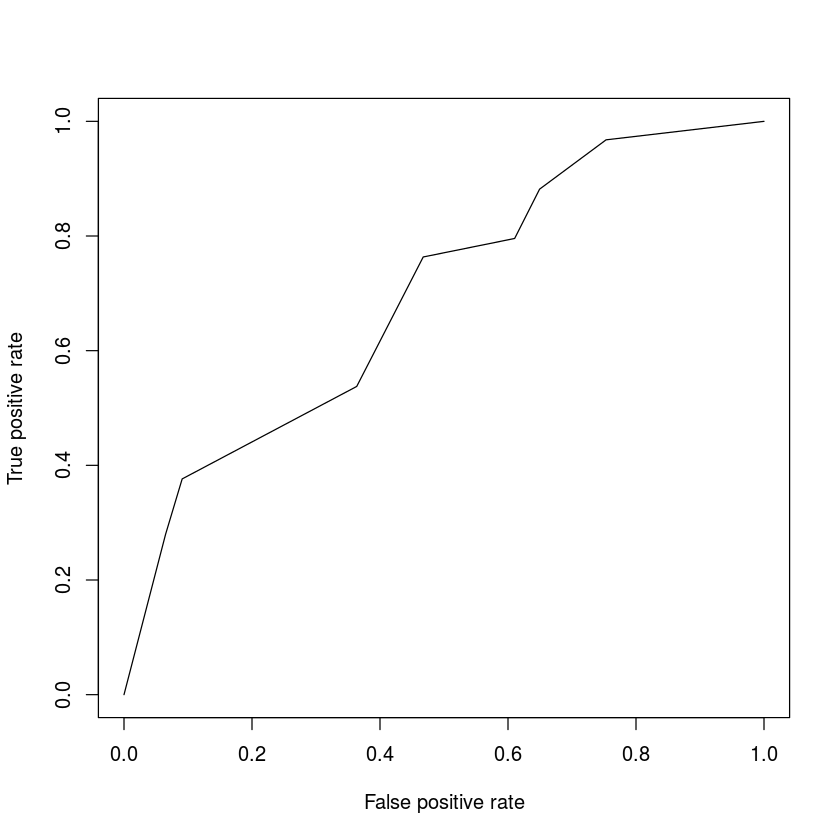

In [13]:
pred = prediction(PredictROC[,2], Test$Reverse)
perf = performance(pred, 'tpr', 'fpr')
plot(perf)

In [14]:
as.numeric(performance(pred, 'auc')@y.values)

[1] 0.6927105

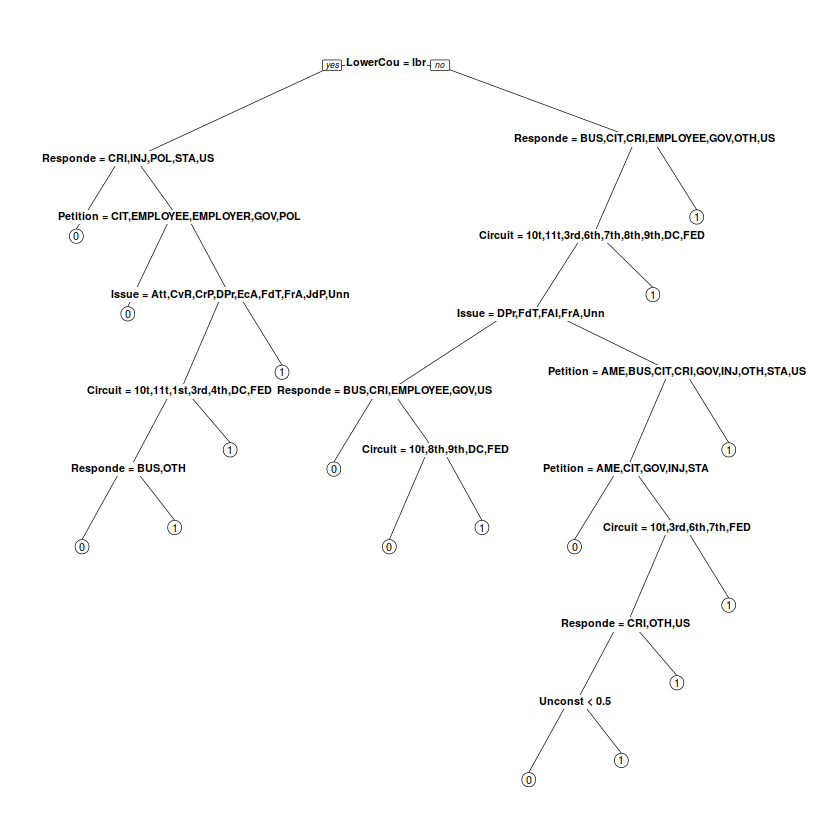

In [16]:
q4 = rpart(Reverse ~ Circuit + Issue + Petitioner +
           Respondent + LowerCourt + Unconst, data=Train,
           method='class', minbucket=5)
prp(q4)

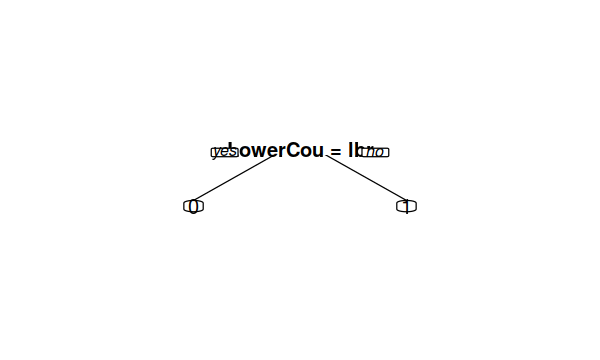

In [19]:
q4 = rpart(Reverse ~ Circuit + Issue + Petitioner +
           Respondent + LowerCourt + Unconst, data=Train,
           method='class', minbucket=100)
options(repr.plot.width=5, repr.plot.height=3)
prp(q4)

In [20]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [22]:
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner +
                             Respondent + LowerCourt + Unconst,
                             data=Train, nodesize=25, ntree=200)

Warning message:
In randomForest.default(m, y, ...): The response has five or fewer unique values.  Are you sure you want to do regression?

In [23]:
Train$Reverse = as.factor(Train$Reverse)
Test$Reverse = as.factor(Test$Reverse)

In [24]:
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner +
                             Respondent + LowerCourt + Unconst,
                             data=Train, nodesize=25, ntree=200)

In [25]:
PredictForest = predict(StevensForest, newdata=Test)
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 44 33
  1 18 75

In [26]:
(44+75)/(44+33+18+75)

[1] 0.7

In [27]:
set.seed(100)
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner +
                             Respondent + LowerCourt + Unconst,
                             data=Train, nodesize=25, ntree=200)
PredictForest = predict(StevensForest, newdata=Test)
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 43 34
  1 19 74

In [28]:
(43+74)/(43+34+19+74)

[1] 0.6882353

In [29]:
set.seed(200)
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner +
                             Respondent + LowerCourt + Unconst,
                             data=Train, nodesize=25, ntree=200)
PredictForest = predict(StevensForest, newdata=Test)
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 44 33
  1 17 76

In [30]:
(44+76)/(44+33+17+76)

[1] 0.7058824

In [31]:
library(caret)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [32]:
numFolds = trainControl(method='cv', number = 10)
cpGrid = expand.grid(.cp=seq(0.01, 0.5, 0.01))
train(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst,
      data=Train, method='rpart', trControl=numFolds, tuneGrid=cpGrid)

CART 

396 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 357, 356, 357, 356, 356, 356, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.6365385  0.252522710
  0.02  0.6337179  0.248281522
  0.03  0.6314103  0.251796733
  0.04  0.6314103  0.253786180
  0.05  0.6440385  0.282995035
  0.06  0.6440385  0.282995035
  0.07  0.6440385  0.282995035
  0.08  0.6440385  0.282995035
  0.09  0.6440385  0.282995035
  0.10  0.6440385  0.282995035
  0.11  0.6440385  0.282995035
  0.12  0.6440385  0.282995035
  0.13  0.6440385  0.282995035
  0.14  0.6440385  0.282995035
  0.15  0.6440385  0.282995035
  0.16  0.6440385  0.282995035
  0.17  0.6440385  0.282995035
  0.18  0.6440385  0.282995035
  0.19  0.6440385  0.282995035
  0.20  0.6085897  0.193703966
  0.21  0.5807692  0.121202966
  0.22  0.5605128  0.062732119
  0.23  0.5428846  0.003553299
  0.24  0.5428846  0.003553299
  0.2

In [34]:
StevensTreeCV = rpart(Reverse ~ Circuit + Issue + Petitioner +
                       Respondent + LowerCourt + Unconst,
                       data=Train, method='class', cp=0.18)
PredictCV = predict(StevensTreeCV, newdata=Test, type='class')
table(Test$Reverse, PredictCV)

   PredictCV
     0  1
  0 59 18
  1 29 64

In [36]:
(59+64)/(59+18+29+64)

[1] 0.7235294

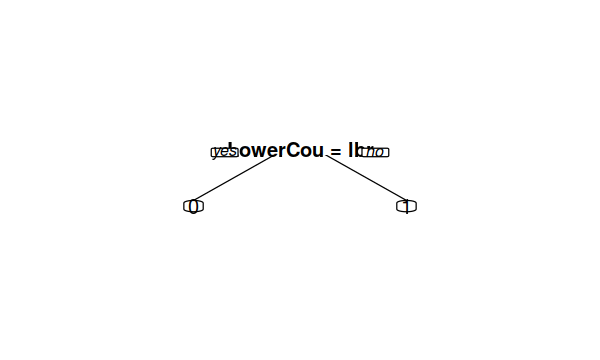

In [37]:
prp(StevensTreeCV)